In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import cufflinks as cf
from pandasql import sqldf
import plotly.express as px
import plotly.graph_objects as go

In [3]:
cf.go_offline
%matplotlib inline

In [4]:
expenses=pd.read_csv('expenses.csv')

### EDA

In [5]:
expenses.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
expenses.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
expenses.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

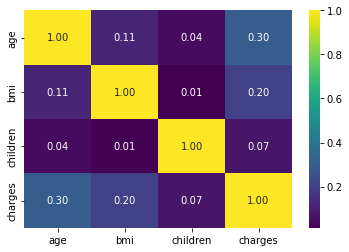

In [21]:
sns.heatmap(expenses.corr(),cmap='viridis',fmt='.2f',annot=True)

bmi and age have strong  correlation with charges

<AxesSubplot:>

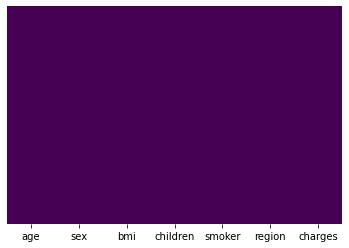

In [11]:
sns.heatmap(expenses.isna(),yticklabels=False,cbar=False,cmap='viridis')

there are no null values

In [29]:
px.pie(expenses.sex.value_counts(),labels=['M','F'])

In [49]:
px.pie(expenses,'sex',labels=['M','F'])

The pie shows the percentage of value counts of sex

In [50]:
px.scatter(expenses,x='age',y='charges',color='smoker')

Older people tend to spend more on medical bill , being a smoker also affects the charges in that smokers are most likely to spend more irrespective of their age.

In [58]:
expenses.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
sns.set(rc={'figure.figsize':(20,8.27)})

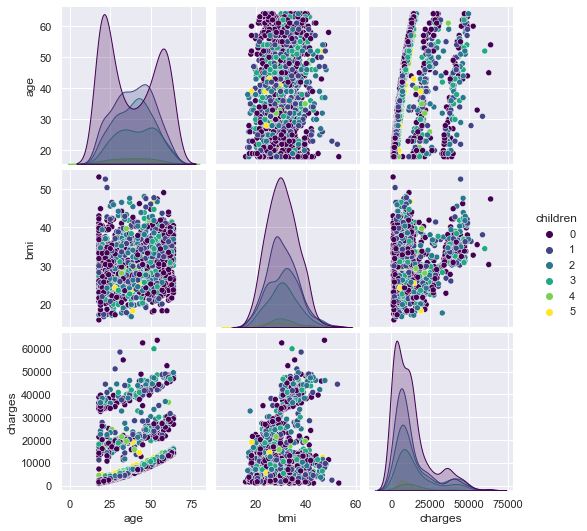

In [69]:
fig1=sns.pairplot(expenses,hue='children',palette='viridis')
